vishesh and shivam 

defeat.

Want to try to use attention to detect image with positional embeddings of images

learn image embeddings through training feed forwards

cross entropy for gd


remap images into sequences

In [12]:
import einops
from einops import rearrange
import torch
import torch.nn as nn
import torch.nn.functional as F
from torch import Tensor
from torch.nn import functional as F
from torch.nn import Module
from torch.nn import ModuleList
from torch.nn import Linear
from torch.nn import LayerNorm
from torch.nn import Dropout
from torch.nn import Embedding
from torch.nn import Parameter
from torch.nn import init
from torch.nn import Sequential
from torch.nn import ReLU
from torch.nn import Conv2d
from torch.nn import Conv1d
from torch.nn import BatchNorm2d
from torch.nn import BatchNorm1d
from torch.nn import Identity
from torch.nn import GELU
from torch.nn import ModuleDict
from torch.nn import Softmax
from torch.nn import MultiheadAttention
from torch.nn import TransformerEncoder
from torch.nn import TransformerEncoderLayer
from torch.nn import TransformerDecoder
from torch.nn import TransformerDecoderLayer
from torch.nn import Transformer
from torchvision.models import vgg11
from torch.utils.data import Dataset, DataLoader
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from collections import Counter
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split

import pickle
import polars as pl
import sklearn
import numpy as np
import pandas as pd
import random

In [2]:
# def open_pickle(path: str) -> pl.DataFrame:
#     with open(path, "rb") as f:
#         df = pickle.load(f)
#     return df

# df = open_pickle("/Users/visheshnarayan/Documents/Code/School/CMSC320/cmsc320-final/checkpoint2/processed_data.pkl")
# df

def open_parquet(path: str) -> pl.DataFrame:
    return pl.read_parquet(path)

df = open_parquet("./processed_data.parquet")
df

Filename,Audio,ID,Label,Duration,Index,Spectrogram
str,list[f64],str,str,f64,i64,list[list[f64]]
"""P01_dysregulation-sick_1.wav""","[-0.107705, -0.120444, … -0.011764]","""P01""","""dysregulation-sick""",0.25542,1,"[[1.065977, 0.518101, … 0.0], [1.580656, 1.416094, … 0.0], … [-0.848501, -1.173668, … 0.0]]"
"""P01_dysregulation-sick_2.wav""","[0.145759, 0.148596, … -0.106267]","""P01""","""dysregulation-sick""",0.928798,2,"[[1.004109, 0.631097, … 0.0], [1.063186, 0.878032, … 0.0], … [-0.65487, -0.980015, … 0.0]]"
"""P01_dysregulation-sick_3.wav""","[0.034167, 0.022343, … 0.075769]","""P01""","""dysregulation-sick""",1.137778,3,"[[0.113385, -0.084511, … 0.0], [0.230624, 0.125456, … 0.0], … [-1.294608, -1.294608, … 0.0]]"
"""P01_dysregulation-sick_4.wav""","[-0.005172, -0.009896, … 0.014526]","""P01""","""dysregulation-sick""",3.645533,4,"[[-0.463286, -0.999457, … -1.294608], [0.193303, 0.107476, … -0.825644], … [-1.294608, -1.294608, … -1.294608]]"
"""P01_dysregulation-sick_5.wav""","[-0.0023, -0.001397, … -0.034967]","""P01""","""dysregulation-sick""",0.394739,5,"[[0.945787, 0.609868, … 0.0], [1.091947, 0.908564, … 0.0], … [-1.294608, -1.294608, … 0.0]]"
…,…,…,…,…,…,…
"""P16_delighted_135.wav""","[0.000027, 0.000085, … 0.010441]","""P16""","""delighted""",1.044898,135,"[[-1.28051, -1.294608, … 0.0], [-0.607567, -0.278059, … 0.0], … [-1.294608, -1.294608, … 0.0]]"
"""P16_delighted_136.wav""","[0.016696, 0.013343, … 0.001006]","""P16""","""delighted""",0.638549,136,"[[0.801103, 0.513365, … 0.0], [0.916264, 0.720454, … 0.0], … [-1.294608, -1.294608, … 0.0]]"
"""P16_delighted_137.wav""","[0.008781, 0.005037, … -0.000396]","""P16""","""delighted""",0.766259,137,"[[0.40735, 0.053851, … 0.0], [0.592834, 0.403585, … 0.0], … [-1.294608, -1.294608, … 0.0]]"


In [ ]:
print(df.columns)
print(df.dtypes)

In [42]:
class FeatureDataset(Dataset):
    def __init__(self, features, labels):
        self.X = torch.tensor(features, dtype=torch.float32)
        self.y = torch.tensor(labels, dtype=torch.long)

    def __len__(self):
        return len(self.X)

    def __getitem__(self, idx):
        return self.X[idx], self.y[idx]


In [43]:


def prepare_feature_dataset(df: pl.DataFrame, feature_cols, label_col="Label", 
                            test_size=0.2, val_size=0.1, seed=42, min_samples_per_class=2):

    # Drop rows with missing values
    pdf = df.select(feature_cols + [label_col]).drop_nulls().to_pandas()

    # Drop underpopulated classes
    label_counts = Counter(pdf[label_col])
    valid_labels = {label for label, count in label_counts.items() if count >= min_samples_per_class}
    pdf = pdf[pdf[label_col].isin(valid_labels)]

    # Encode labels
    label_encoder = LabelEncoder()
    y = label_encoder.fit_transform(pdf[label_col])
    X = pdf[feature_cols].values

    # Normalize features
    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(X)

    num_classes = len(set(y))
    stratify = y if num_classes >= 2 else None  # Only stratify if at least 2 classes

    if num_classes < 2:
        raise ValueError("After filtering, fewer than 2 valid classes remain.")

    try:
        X_train, X_temp, y_train, y_temp = train_test_split(
            X_scaled, y, test_size=(test_size + val_size),
            stratify=stratify, random_state=seed
        )

        stratify_temp = y_temp if len(set(y_temp)) >= 2 else None

        X_val, X_test, y_val, y_test = train_test_split(
            X_temp, y_temp, test_size=test_size / (test_size + val_size),
            stratify=stratify_temp, random_state=seed
        )
    except ValueError as e:
        print("⚠️ Stratified split failed. Falling back to random split.")
        X_train, X_temp, y_train, y_temp = train_test_split(
            X_scaled, y, test_size=(test_size + val_size), random_state=seed
        )
        X_val, X_test, y_val, y_test = train_test_split(
            X_temp, y_temp, test_size=test_size / (test_size + val_size), random_state=seed
        )

    return (
        FeatureDataset(X_train, y_train),
        FeatureDataset(X_val, y_val),
        FeatureDataset(X_test, y_test)
    )


In [15]:
feature_cols = ["Spectral Entropy", "Audio Length", "PitchVar", "MFCC-1", "MFCC-2", "MFCC-3"]
train_ds, val_ds, test_ds = prepare_feature_dataset(df, feature_cols)

train_loader = DataLoader(train_ds, batch_size=32, shuffle=True)
val_loader = DataLoader(val_ds, batch_size=32)
test_loader = DataLoader(test_ds, batch_size=32)

# Instantiate model
num_classes = len(set(y for _, y in train_ds))
model = SimpleAudioNN(input_dim=len(feature_cols), num_classes=num_classes)

⚠️ Stratified split failed. Falling back to random split.


In [20]:
class SimpleAudioNN(nn.Module):
    def __init__(self, input_dim, num_classes):
        super().__init__()
        self.net = nn.Sequential(
            nn.Linear(input_dim, 64),
            nn.ReLU(),
            nn.Linear(64, 128),
            nn.ReLU(),
            nn.Linear(128, 256),
            nn.ReLU(),
            nn.Linear(256, 512),
            nn.ReLU(),
            nn.Linear(512, 256),
            nn.ReLU(),
            nn.Linear(256, 32),
            nn.ReLU(),
            nn.Linear(32, num_classes)
        )

    def forward(self, x):
        return self.net(x)

In [25]:
import matplotlib.pyplot as plt

def train_model(
        model,
        train_loader,
        val_loader,
        num_epochs=20,
        lr=1e-2,
        device="cuda" if torch.cuda.is_available() else "cpu"
    ) -> tuple[nn.Module, dict]:
    
    model = model.to(device)
    optimizer = torch.optim.Adam(model.parameters(), lr=lr)
    criterion = nn.CrossEntropyLoss()

    history = {
        "train_loss": [],
        "train_acc": [],
        "val_acc": []
    }

    for epoch in range(num_epochs):
        model.train()
        total_loss, correct, total = 0.0, 0, 0

        for inputs, labels in train_loader:
            inputs, labels = inputs.to(device), labels.to(device)
            optimizer.zero_grad()

            outputs = model(inputs)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()

            total_loss += loss.item() * inputs.size(0)
            _, preds = torch.max(outputs, 1)
            correct += (preds == labels).sum().item()
            total += labels.size(0)

        avg_loss = total_loss / total
        train_acc = correct / total
        val_acc = evaluate(model, val_loader, device)

        history["train_loss"].append(avg_loss)
        history["train_acc"].append(train_acc)
        history["val_acc"].append(val_acc)

        print(f"Epoch {epoch+1:02d} | Train Loss: {avg_loss:.4f} | Train Acc: {train_acc:.4f} | Val Acc: {val_acc:.4f}")

    # Plot after training
    plt.figure(figsize=(10, 5))
    plt.plot(history["train_loss"], label="Train Loss")
    plt.plot(history["train_acc"], label="Train Accuracy")
    plt.plot(history["val_acc"], label="Validation Accuracy")
    plt.title("Training History")
    plt.xlabel("Epoch")
    plt.ylabel("Metric")
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.savefig("training_plot.png")
    plt.show()

    return model, history


def evaluate(model, loader, device="cuda" if torch.cuda.is_available() else "cpu"):
    model.eval()
    correct, total = 0, 0
    with torch.no_grad():
        for inputs, labels in loader:
            inputs, labels = inputs.to(device), labels.to(device)
            outputs = model(inputs)
            _, preds = torch.max(outputs, 1)
            correct += (preds == labels).sum().item()
            total += labels.size(0)
    return correct / total

Epoch 01 | Train Loss: 2.3544 | Train Acc: 0.2477 | Val Acc: 0.3319
Epoch 02 | Train Loss: 1.9720 | Train Acc: 0.3087 | Val Acc: 0.2359
Epoch 03 | Train Loss: 1.9365 | Train Acc: 0.3230 | Val Acc: 0.3121
Epoch 04 | Train Loss: 1.8924 | Train Acc: 0.3253 | Val Acc: 0.3234
Epoch 05 | Train Loss: 1.8766 | Train Acc: 0.3376 | Val Acc: 0.3220
Epoch 06 | Train Loss: 1.8735 | Train Acc: 0.3356 | Val Acc: 0.2938
Epoch 07 | Train Loss: 1.8479 | Train Acc: 0.3382 | Val Acc: 0.3178
Epoch 08 | Train Loss: 1.8350 | Train Acc: 0.3446 | Val Acc: 0.3065
Epoch 09 | Train Loss: 1.8309 | Train Acc: 0.3454 | Val Acc: 0.3686
Epoch 10 | Train Loss: 1.8065 | Train Acc: 0.3559 | Val Acc: 0.3460
Epoch 11 | Train Loss: 1.7933 | Train Acc: 0.3592 | Val Acc: 0.3319
Epoch 12 | Train Loss: 1.7603 | Train Acc: 0.3739 | Val Acc: 0.3460
Epoch 13 | Train Loss: 1.7561 | Train Acc: 0.3824 | Val Acc: 0.3588
Epoch 14 | Train Loss: 1.7500 | Train Acc: 0.3818 | Val Acc: 0.3616
Epoch 15 | Train Loss: 1.7471 | Train Acc: 0.387

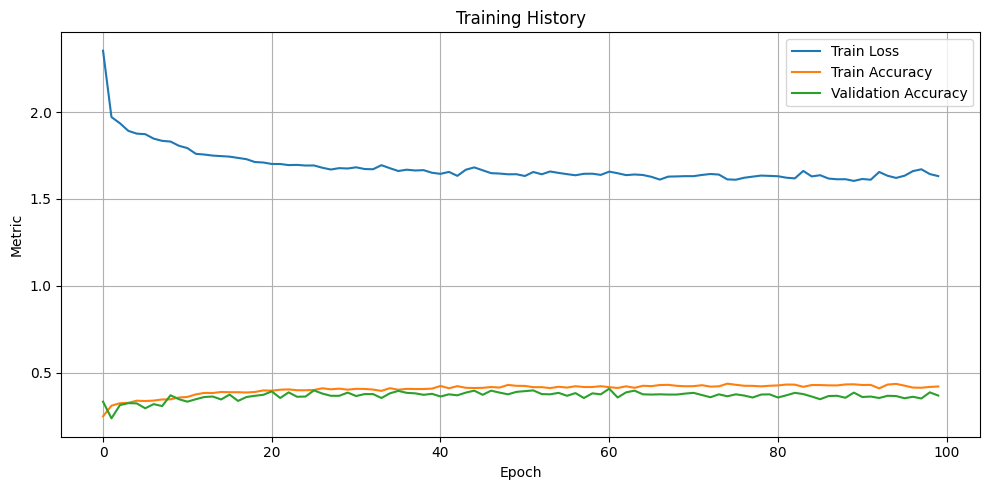

In [26]:
# Assuming you already did:
# train_ds, val_ds, test_ds = prepare_feature_dataset(...)

train_loader = DataLoader(train_ds, batch_size=32, shuffle=True)
val_loader = DataLoader(val_ds, batch_size=32)
test_loader = DataLoader(test_ds, batch_size=32)

num_features = train_ds[0][0].shape[0]
num_classes = len(set(label for _, label in train_ds))

model = SimpleAudioNN(input_dim=num_features, num_classes=num_classes)

# Train the model
trained_model = train_model(model, train_loader, val_loader, num_epochs=100)

Epoch 01 | Train Loss: 2.6343 | Train Acc: 0.2392 | Val Acc: 0.2203
Epoch 02 | Train Loss: 2.0051 | Train Acc: 0.2752 | Val Acc: 0.2429
Epoch 03 | Train Loss: 1.9439 | Train Acc: 0.3121 | Val Acc: 0.3305
Epoch 04 | Train Loss: 1.8925 | Train Acc: 0.3172 | Val Acc: 0.3093
Epoch 05 | Train Loss: 1.8631 | Train Acc: 0.3265 | Val Acc: 0.3192
Epoch 06 | Train Loss: 1.8543 | Train Acc: 0.3345 | Val Acc: 0.3305
Epoch 07 | Train Loss: 1.7985 | Train Acc: 0.3652 | Val Acc: 0.3446
Epoch 08 | Train Loss: 1.7996 | Train Acc: 0.3547 | Val Acc: 0.3658
Epoch 09 | Train Loss: 1.7589 | Train Acc: 0.3685 | Val Acc: 0.3404
Epoch 10 | Train Loss: 1.7461 | Train Acc: 0.3818 | Val Acc: 0.3432
Epoch 11 | Train Loss: 1.7363 | Train Acc: 0.3842 | Val Acc: 0.3404
Epoch 12 | Train Loss: 1.7251 | Train Acc: 0.3885 | Val Acc: 0.3602
Epoch 13 | Train Loss: 1.7192 | Train Acc: 0.4006 | Val Acc: 0.3672
Epoch 14 | Train Loss: 1.6940 | Train Acc: 0.3963 | Val Acc: 0.3743
Epoch 15 | Train Loss: 1.6867 | Train Acc: 0.405

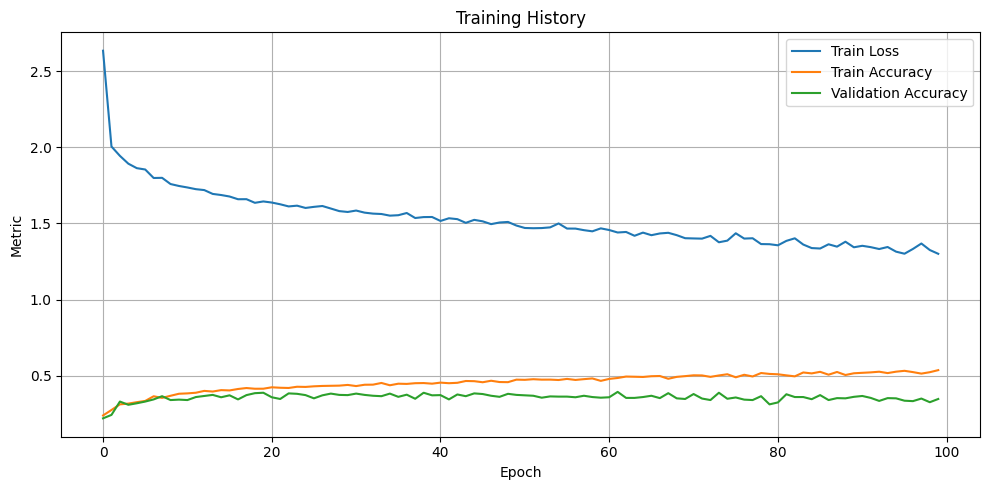

In [27]:
batch_size = 64

train_loader = DataLoader(train_ds, batch_size=batch_size, shuffle=True)
val_loader = DataLoader(val_ds, batch_size=batch_size)
test_loader = DataLoader(test_ds, batch_size=batch_size)

num_features = train_ds[0][0].shape[0]
num_classes = len(set(label for _, label in train_ds))

model = SimpleAudioNN(input_dim=num_features, num_classes=num_classes)

# Train the model
trained_model = train_model(model, train_loader, val_loader, num_epochs=100)

Epoch 01 | Train Loss: 2.2589 | Train Acc: 0.2839 | Val Acc: 0.3079
Epoch 02 | Train Loss: 1.9340 | Train Acc: 0.3099 | Val Acc: 0.2994
Epoch 03 | Train Loss: 1.8912 | Train Acc: 0.3222 | Val Acc: 0.2938
Epoch 04 | Train Loss: 1.8940 | Train Acc: 0.3121 | Val Acc: 0.2655
Epoch 05 | Train Loss: 1.8800 | Train Acc: 0.3341 | Val Acc: 0.3249
Epoch 06 | Train Loss: 1.8638 | Train Acc: 0.3275 | Val Acc: 0.3093
Epoch 07 | Train Loss: 1.8640 | Train Acc: 0.3327 | Val Acc: 0.3347
Epoch 08 | Train Loss: 1.8509 | Train Acc: 0.3386 | Val Acc: 0.3121
Epoch 09 | Train Loss: 1.8774 | Train Acc: 0.3188 | Val Acc: 0.2853
Epoch 10 | Train Loss: 1.8761 | Train Acc: 0.3152 | Val Acc: 0.3418
Epoch 11 | Train Loss: 1.8487 | Train Acc: 0.3295 | Val Acc: 0.3305
Epoch 12 | Train Loss: 1.8444 | Train Acc: 0.3333 | Val Acc: 0.3206
Epoch 13 | Train Loss: 1.8289 | Train Acc: 0.3420 | Val Acc: 0.3333
Epoch 14 | Train Loss: 1.8320 | Train Acc: 0.3402 | Val Acc: 0.3107
Epoch 15 | Train Loss: 1.8222 | Train Acc: 0.344

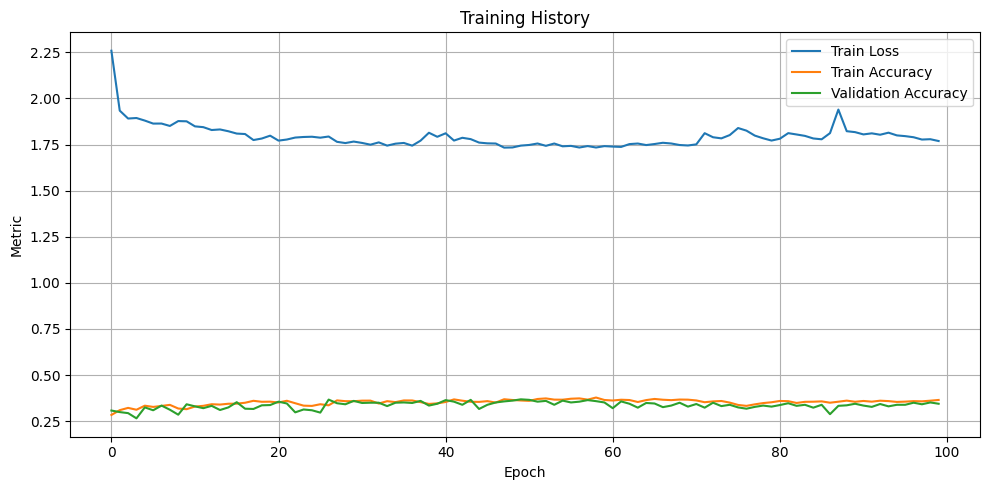

In [28]:
batch_size = 16

train_loader = DataLoader(train_ds, batch_size=batch_size, shuffle=True)
val_loader = DataLoader(val_ds, batch_size=batch_size)
test_loader = DataLoader(test_ds, batch_size=batch_size)

num_features = train_ds[0][0].shape[0]
num_classes = len(set(label for _, label in train_ds))

model = SimpleAudioNN(input_dim=num_features, num_classes=num_classes)

# Train the model
trained_model = train_model(model, train_loader, val_loader, num_epochs=100)

In [ ]:
## dataset 
class SpectogramDataset(Dataset): 
    def __init__(self,
        spectograms, 
        labels,
        transform=None,
        target_transform=None
    ):
        self.spectograms = spectograms
        self.labels = labels
        self.transform = transform
        self.target_transform = target_transform
    
    def __len__(self):
        return len(self.spectograms)
    
    def __getitem__(self, idx):
        spectogram = np.stack(self.spectograms[idx])
        label = self.labels[idx]
        
        try:
            spectogram = np.asarray(spectogram, dtype=np.float32)
        except Exception as e:
            print(f"❌ Spectrogram at index {idx} could not be converted: {e}")
            raise


        if self.transform:
            spectogram = self.transform(spectogram)
        if self.target_transform:
            label = self.target_transform(label)

        return np.stack(spectogram), label
    

# --- Transformer Head ---
class TransformerHead(nn.Module):
    def __init__(
            self, in_dim, num_classes,
            num_patches=49, dim=128, depth=2,
            heads=4, mlp_dim=256, dropout=0.1
    ):
        super().__init__()
        self.patch_proj = nn.Linear(in_dim, dim)
        self.pos_embed = nn.Parameter(torch.randn(1, num_patches, dim))
        encoder_layer = nn.TransformerEncoderLayer(
            d_model=dim, nhead=heads, dim_feedforward=mlp_dim, dropout=dropout, batch_first=True
        )
        self.transformer = nn.TransformerEncoder(encoder_layer, num_layers=depth)
        self.classifier = nn.Sequential(
            nn.LayerNorm(dim),
            nn.Linear(dim, num_classes)
        )

    def forward(self, x):
        B, C, H, W = x.shape
        x = rearrange(x, 'b c h w -> b (h w) c')  # flatten spatial dims
        x = self.patch_proj(x) + self.pos_embed[:, :x.size(1), :]
        x = self.transformer(x)
        x = x.mean(dim=1)  # mean pooling
        return self.classifier(x)

# --- VGG11 + Transformer Model with Preprocessing ---
class VGGWithTransformer(nn.Module):
    def __init__(self, num_classes):
        super().__init__()
        vgg = vgg11(pretrained=True)
        self.preprocess = nn.Sequential(
            nn.Upsample(size=(224, 224), mode='bilinear', align_corners=False),  # resize
            nn.Conv2d(1, 3, kernel_size=1)  # convert 1 channel to 3 (learnable)
        )
        self.features = vgg.features  # outputs [B, 512, 7, 7]
        self.transformer_head = TransformerHead(in_dim=512, num_classes=num_classes, num_patches=49)

    def forward(self, x):  # x shape: (B, 1, 128, 128)
        x = self.preprocess(x)  # (B, 3, 224, 224)
        x = self.features(x)    # (B, 512, 7, 7)
        return self.transformer_head(x)

## dataset
def prepare_spectrogram_dataset(
        spectrograms, labels, 
        min_samples=2,
        test_size=0.2, val_size=0.1,
        transform_train=None, transform_eval=None, seed=42
    ):

    # Filter out rare classes
    counts = Counter(labels)
    valid_idxs = [i for i, lbl in enumerate(labels) if counts[lbl] >= min_samples]
    specs = [spectrograms[i] for i in valid_idxs]
    lbls = [labels[i] for i in valid_idxs]

    # Encode labels
    le = LabelEncoder()
    y = le.fit_transform(lbls)

    # Split
    X_train, X_temp, y_train, y_temp = train_test_split(specs, y, test_size=(test_size + val_size), stratify=y, random_state=seed)
    X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=test_size/(test_size + val_size), stratify=y_temp, random_state=seed)

    # Wrap in datasets
    train_ds = SpectogramDataset(X_train, y_train, transform=transform_train)
    val_ds   = SpectogramDataset(X_val,   y_val,   transform=transform_eval)
    test_ds  = SpectogramDataset(X_test,  y_test,  transform=transform_eval)

    return train_ds, val_ds, test_ds, le

# --- Transforms ---
def mask_patch(x, axis=2, width=10):
    max_dim = x.size(axis)
    if max_dim <= width:
        return x
    start = random.randint(0, max_dim - width)
    if axis == 1:
        x[:, start:start+width, :] = 0
    elif axis == 2:
        x[:, :, start:start+width] = 0
    return x

from torchvision import transforms

base_transform = transforms.Compose([
    transforms.Lambda(lambda x: torch.tensor(x, dtype=torch.float32)),
    transforms.Lambda(lambda x: x.unsqueeze(0) if x.ndim == 2 else x),
    transforms.Resize((224, 224)),
    transforms.Normalize(mean=[0.5], std=[0.5])
])

augment_transform = transforms.Compose([
    transforms.Lambda(lambda x: torch.tensor(x, dtype=torch.float32)),
    transforms.Lambda(lambda x: x.unsqueeze(0) if x.ndim == 2 else x),
    transforms.Resize((224, 224)),
    transforms.Lambda(lambda x: x + 0.01 * torch.randn_like(x) if random.random() < 0.5 else x),
    transforms.Lambda(lambda x: mask_patch(x, axis=2, width=20) if random.random() < 0.5 else x),
    transforms.Lambda(lambda x: mask_patch(x, axis=1, width=8) if random.random() < 0.5 else x)
])

In [22]:
# prepare valid data set 
# valid_specs = []
# valid_labels = []

# for i, (spec, lbl) in enumerate(zip(balanced["Spectrogram"], balanced["Label"])):
#     try:
#         arr = np.array(spec, dtype=np.float32)
#         arr = np.stack(arr)
#         assert arr.ndim == 2 and arr.shape[0] == arr.shape[1]  # e.g., 128x128
#         valid_specs.append(arr)
#         valid_labels.append(lbl)
#     except Exception as e:
#         print(f"❌ Skipping row {i}: {e}")

# # Update the DataFrame or use valid_specs and valid_labels directly
# balanced = pd.DataFrame({"Spectrogram": valid_specs, "Label": valid_labels})

In [23]:
# balanced = open_parquet("./balanced_audio_data.parquet")

train_ds, val_ds, test_ds, label_encoder = prepare_spectrogram_dataset(
    spectrograms=balanced["Spectrogram"],
    labels=balanced["Label"],
    min_samples=2,
    transform_train=augment_transform,
    transform_eval=base_transform
)

train_loader = DataLoader(train_ds, batch_size=32, shuffle=True)
val_loader = DataLoader(val_ds, batch_size=32)
test_loader = DataLoader(test_ds, batch_size=32)

model = VGGWithTransformer(num_classes=balanced["Label"].unique().count())

/Users/visheshnarayan/Documents/Code/School/CMSC320/cmsc320-final/.venv-311/lib/python3.11/site-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/Users/visheshnarayan/Documents/Code/School/CMSC320/cmsc320-final/.venv-311/lib/python3.11/site-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=VGG11_Weights.IMAGENET1K_V1`. You can also use `weights=VGG11_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


In [24]:
# Reimport all essentials after kernel reset
import matplotlib.pyplot as plt

def train_model(
    model,
    train_loader,
    val_loader,
    num_epochs=20,
    lr=1e-3,
    device="cuda" if torch.cuda.is_available() else "cpu"
):
    model = model.to(device)
    optimizer = torch.optim.Adam(model.parameters(), lr=lr)
    criterion = nn.CrossEntropyLoss()

    history = {"train_loss": [], "train_acc": [], "val_acc": []}

    for epoch in range(num_epochs):
        model.train()
        total_loss, correct, total = 0.0, 0, 0

        for inputs, labels in train_loader:
            inputs, labels = inputs.to(device), labels.to(device)
            optimizer.zero_grad()

            outputs = model(inputs)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()

            total_loss += loss.item() * inputs.size(0)
            _, preds = torch.max(outputs, 1)
            correct += (preds == labels).sum().item()
            total += labels.size(0)

        avg_loss = total_loss / total
        train_acc = correct / total
        val_acc = evaluate(model, val_loader, device)

        history["train_loss"].append(avg_loss)
        history["train_acc"].append(train_acc)
        history["val_acc"].append(val_acc)

        print(f"Epoch {epoch+1:02d} | Loss: {avg_loss:.4f} | Train Acc: {train_acc:.4f} | Val Acc: {val_acc:.4f}")

    # Plot results
    plt.figure(figsize=(10, 5))
    plt.plot(history["train_loss"], label="Train Loss")
    plt.plot(history["train_acc"], label="Train Acc")
    plt.plot(history["val_acc"], label="Val Acc")
    plt.title("Training History")
    plt.xlabel("Epoch")
    plt.ylabel("Metric")
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.savefig("training_history.png")
    plt.show()

    return model, history

def evaluate(model, loader, device):
    model.eval()
    correct, total = 0, 0
    with torch.no_grad():
        for inputs, labels in loader:
            if inputs.shape[1] == 1:
                inputs = inputs.repeat(1, 3, 1, 1)
            inputs, labels = inputs.to(device), labels.to(device)
            outputs = model(inputs)
            _, preds = torch.max(outputs, 1)
            correct += (preds == labels).sum().item()
            total += labels.size(0)
    return correct / total

In [ ]:
train_model(
    model=model,
    train_loader=train_loader,
    val_loader=val_loader
)

In [4]:
specs = df["Spectrogram"]
specs

Spectrogram
list[list[f64]]
"[[1.065977, 0.518101, … 0.0], [1.580656, 1.416094, … 0.0], … [-0.848501, -1.173668, … 0.0]]"
"[[1.004109, 0.631097, … 0.0], [1.063186, 0.878032, … 0.0], … [-0.65487, -0.980015, … 0.0]]"
"[[0.113385, -0.084511, … 0.0], [0.230624, 0.125456, … 0.0], … [-1.294608, -1.294608, … 0.0]]"
"[[-0.463286, -0.999457, … -1.294608], [0.193303, 0.107476, … -0.825644], … [-1.294608, -1.294608, … -1.294608]]"
"[[0.945787, 0.609868, … 0.0], [1.091947, 0.908564, … 0.0], … [-1.294608, -1.294608, … 0.0]]"
…
"[[-1.28051, -1.294608, … 0.0], [-0.607567, -0.278059, … 0.0], … [-1.294608, -1.294608, … 0.0]]"
"[[0.801103, 0.513365, … 0.0], [0.916264, 0.720454, … 0.0], … [-1.294608, -1.294608, … 0.0]]"
"[[0.40735, 0.053851, … 0.0], [0.592834, 0.403585, … 0.0], … [-1.294608, -1.294608, … 0.0]]"


In [9]:
num_ex = specs[0].to_numpy()

In [28]:
num_ex

array([array([ 1.06597653,  0.518101  ,  0.14770205, -0.4103249 , -0.90851299,
              -0.71360211, -0.99163257, -0.65383852, -1.1343649 , -0.46631709,
              -0.8696688 , -0.70592194, -0.88979584, -0.60570201, -0.36358636,
              -0.48609885, -0.71444498, -0.61283826, -0.39440658, -0.39105737,
               0.01781729,  0.05418435,  0.12255299,  0.        ,  0.        ,
               0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
               0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
               0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
               0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
               0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
               0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
               0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
               0.        ,  0.        ,  0.        ,

In [29]:
num_ex[0]

array([ 1.06597653,  0.518101  ,  0.14770205, -0.4103249 , -0.90851299,
       -0.71360211, -0.99163257, -0.65383852, -1.1343649 , -0.46631709,
       -0.8696688 , -0.70592194, -0.88979584, -0.60570201, -0.36358636,
       -0.48609885, -0.71444498, -0.61283826, -0.39440658, -0.39105737,
        0.01781729,  0.05418435,  0.12255299,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.  

In [30]:
num_ex.shape

(128,)

In [31]:
num_ex[0].shape

(128,)

In [32]:
import numpy as np
ong = np.stack(num_ex)
ong

array([[ 1.06597653,  0.518101  ,  0.14770205, ...,  0.        ,
         0.        ,  0.        ],
       [ 1.58065596,  1.41609445,  0.84871715, ...,  0.        ,
         0.        ,  0.        ],
       [ 1.84356789,  1.68563257,  0.9093623 , ...,  0.        ,
         0.        ,  0.        ],
       ...,
       [-0.84384425, -1.16900715, -1.29460823, ...,  0.        ,
         0.        ,  0.        ],
       [-0.84737747, -1.17261173, -1.29460823, ...,  0.        ,
         0.        ,  0.        ],
       [-0.84850094, -1.17366781, -1.29460823, ...,  0.        ,
         0.        ,  0.        ]])

In [33]:
ong.shape

(128, 128)

In [34]:
ong.reshape(1, 128, 128)

array([[[ 1.06597653,  0.518101  ,  0.14770205, ...,  0.        ,
          0.        ,  0.        ],
        [ 1.58065596,  1.41609445,  0.84871715, ...,  0.        ,
          0.        ,  0.        ],
        [ 1.84356789,  1.68563257,  0.9093623 , ...,  0.        ,
          0.        ,  0.        ],
        ...,
        [-0.84384425, -1.16900715, -1.29460823, ...,  0.        ,
          0.        ,  0.        ],
        [-0.84737747, -1.17261173, -1.29460823, ...,  0.        ,
          0.        ,  0.        ],
        [-0.84850094, -1.17366781, -1.29460823, ...,  0.        ,
          0.        ,  0.        ]]])

In [35]:
balanced = open_parquet("./balanced_audio_data.parquet")
balanced

Filename,Audio,ID,Label,Duration,Index,Spectrogram
str,list[f64],str,str,f64,i64,list[list[f64]]
"""P01_dysregulation-sick_1.wav""","[-0.107705, -0.120444, … -0.011764]","""P01""","""dysregulation-sick""",0.25542,1,"[[1.065977, 0.518101, … 0.0], [1.580656, 1.416094, … 0.0], … [-0.848501, -1.173668, … 0.0]]"
"""P01_dysregulation-sick_2.wav""","[0.145759, 0.148596, … -0.106267]","""P01""","""dysregulation-sick""",0.928798,2,"[[1.004109, 0.631097, … 0.0], [1.063186, 0.878032, … 0.0], … [-0.65487, -0.980015, … 0.0]]"
"""P01_dysregulation-sick_3.wav""","[0.034167, 0.022343, … 0.075769]","""P01""","""dysregulation-sick""",1.137778,3,"[[0.113385, -0.084511, … 0.0], [0.230624, 0.125456, … 0.0], … [-1.294608, -1.294608, … 0.0]]"
"""P01_dysregulation-sick_4.wav""","[-0.005172, -0.009896, … 0.014526]","""P01""","""dysregulation-sick""",3.645533,4,"[[-0.463286, -0.999457, … -1.294608], [0.193303, 0.107476, … -0.825644], … [-1.294608, -1.294608, … -1.294608]]"
"""P01_dysregulation-sick_5.wav""","[-0.0023, -0.001397, … -0.034967]","""P01""","""dysregulation-sick""",0.394739,5,"[[0.945787, 0.609868, … 0.0], [1.091947, 0.908564, … 0.0], … [-1.294608, -1.294608, … 0.0]]"
…,…,…,…,…,…,…
"""P08_laughter_synthetic_784.wav""","[0.017018, -0.043348, … -0.119718]","""P08""","""laughter""",1.463545,784,"[[1.366536, 0.890631, … 0.143789], [1.43801, 1.37233, … 0.498969], … [-1.216534, -1.322851, … -1.202904]]"
"""P08_laughter_synthetic_785.wav""","[-0.037239, 0.016256, … 0.180288]","""P08""","""laughter""",1.327318,785,"[[0.230315, 0.040219, … -1.225056], [0.974243, 0.579778, … -0.322938], … [-1.284826, -1.335046, … -0.833487]]"
"""P05_laughter_synthetic_786.wav""","[0.030881, 0.017694, … -0.027863]","""P05""","""laughter""",1.130345,786,"[[-0.369768, 0.029032, … -1.145409], [0.507186, -0.377757, … -0.170469], … [-1.300046, -1.305674, … -0.812794]]"


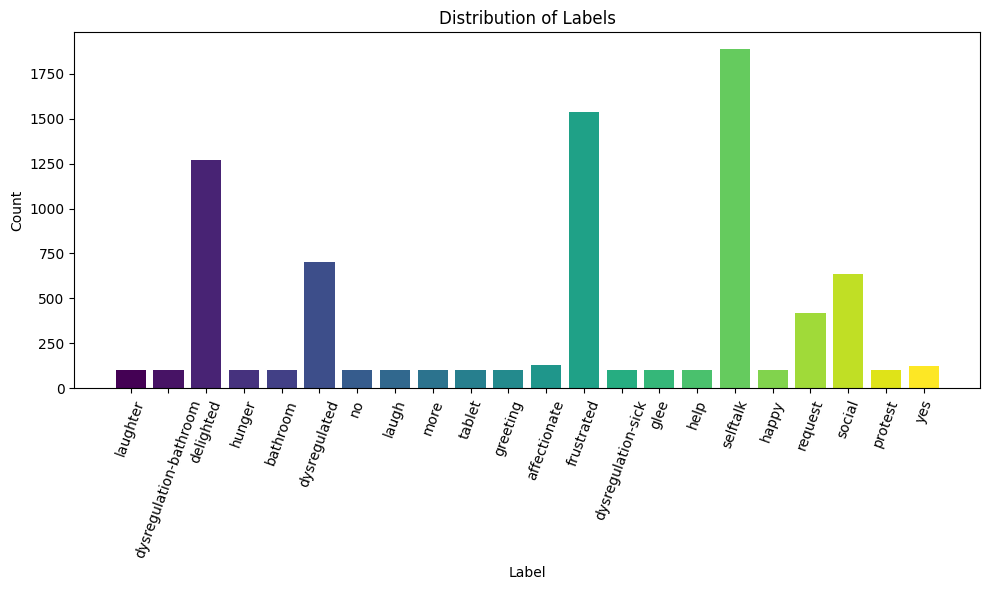

In [37]:
import matplotlib.pyplot as plt
label_counts = balanced["Label"].value_counts()
colors = plt.cm.viridis(np.linspace(0, 1, len(label_counts))) # pretty colors 
plt.figure(figsize=(10, 6))
plt.bar(label_counts['Label'], label_counts['count'], color=colors)
plt.title('Distribution of Labels')
plt.xlabel('Label')
plt.ylabel('Count')
plt.xticks(rotation=70) # so labels don't overlap
plt.tight_layout()
plt.show()